In [3]:
import diffusers
from diffusers import UNet2DConditionModel
from PIL import Image
import sys
import torch
import cv2
from transformers import CLIPVisionModel, CLIPImageProcessor

sys.path.append("/home/aihao/workspace/StableDiffusionReferenceOnly/src")
from stable_diffusion_reference_only.pipelines.stable_diffusion_reference_only_pipeline import (
    StableDiffusionReferenceOnlyPipeline,
)

In [2]:
pipe = StableDiffusionReferenceOnlyPipeline.from_pretrained(
    "/home/aihao/workspace/DeepLearningContent/models/sd_reference_only/init"
).to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
prompt_path = (
    "/home/aihao/workspace/StableDiffusionReferenceOnly/validation_images/1/1.jpg"
)
blueprint_path = (
    "/home/aihao/workspace/StableDiffusionReferenceOnly/validation_images/4/2.jpg"
)

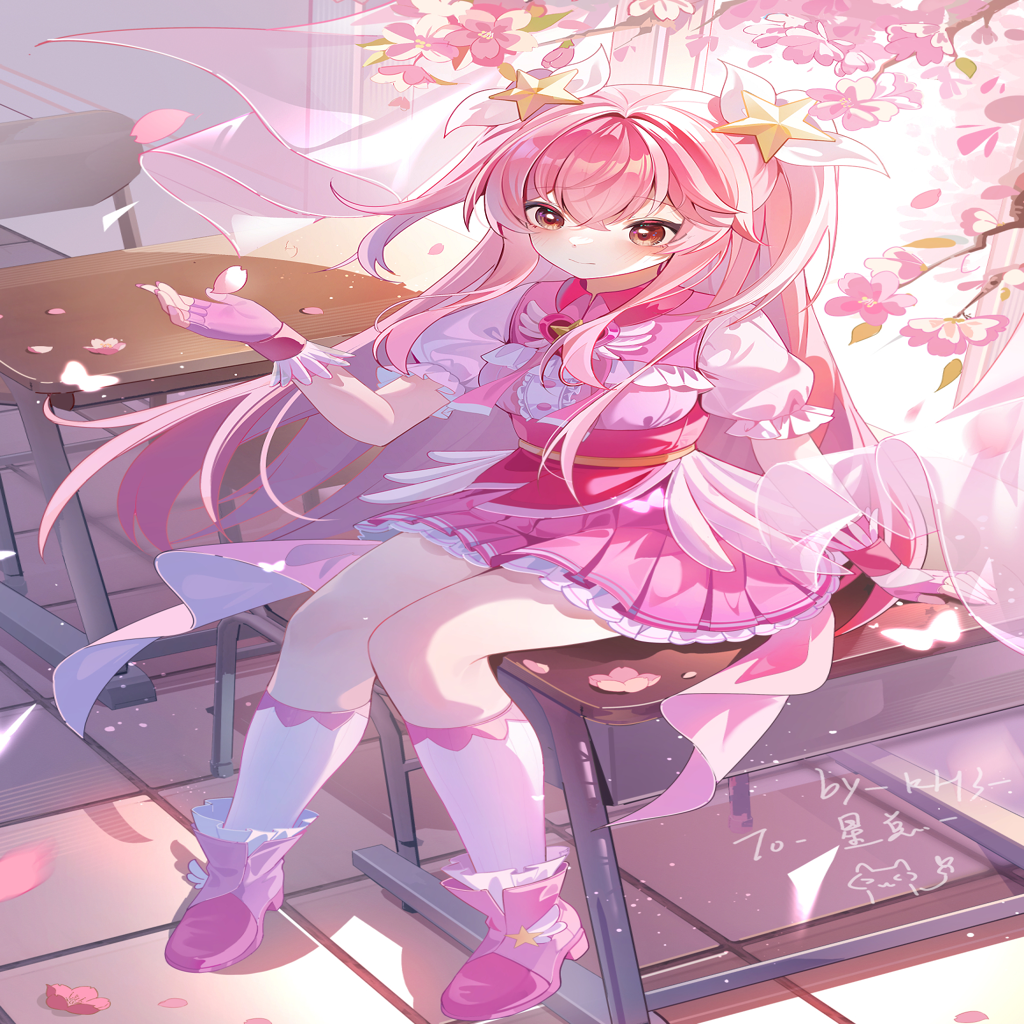

In [4]:
prompt = Image.open(prompt_path).resize((1024, 1024))
prompt

In [6]:
blueprint = cv2.imread(blueprint_path, cv2.IMREAD_GRAYSCALE)
blueprint = cv2.adaptiveThreshold(
    blueprint,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=5,
    C=7,
)
blueprint = Image.fromarray(blueprint).convert("RGB").resize((1024, 1024))
blueprint
blueprint.save(blueprint_path)

  0%|          | 0/50 [00:00<?, ?it/s]

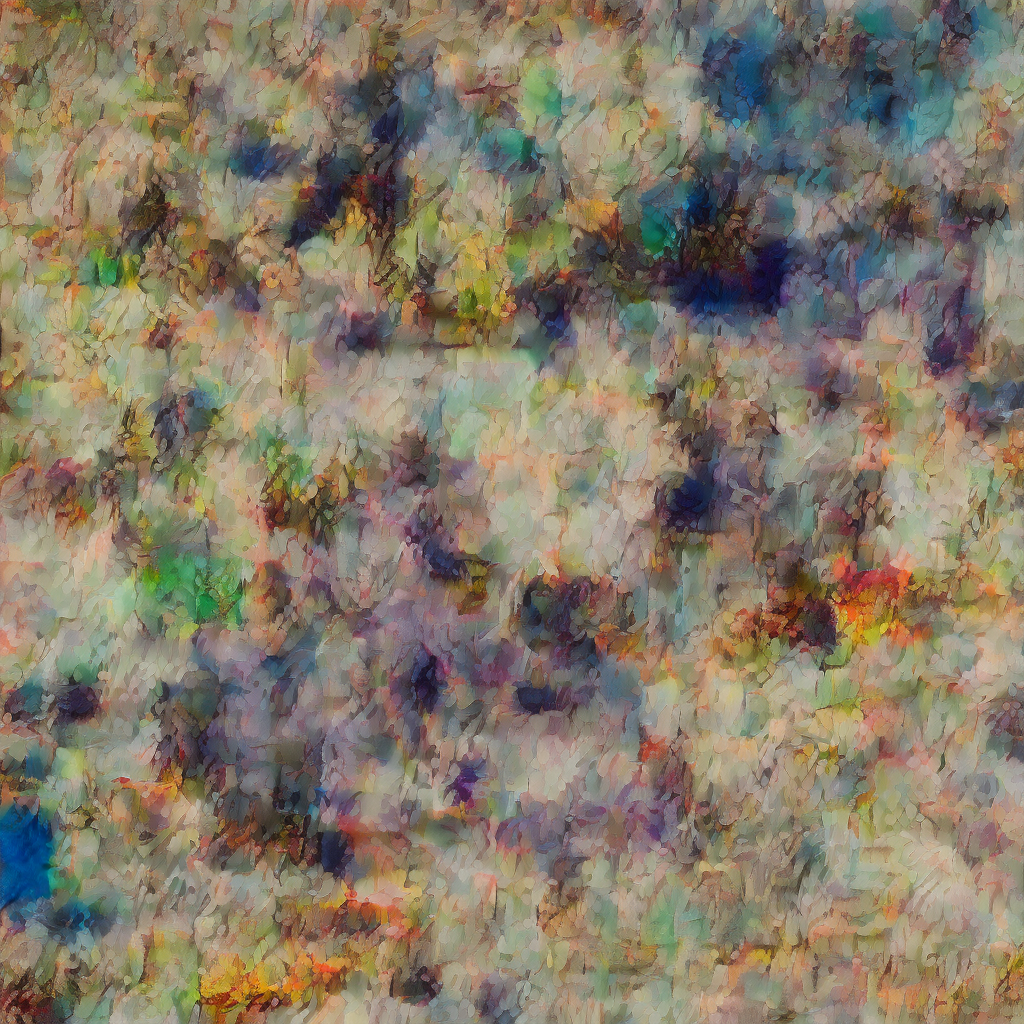

In [8]:
pipe(
    prompt,
    blueprint,
    train_image_encoder=False,
).images[0]